In [61]:
# 1. Load Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
import nltk
nltk.download('all')
from nltk.tokenize import word_tokenize
from nltk import BigramAssocMeasures
from nltk.text import Text
from wordcloud import WordCloud
from nltk.corpus import stopwords
import string

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /home/timlinux/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/timlinux/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/timlinux/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/timlinux/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /home/timlinux/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading pa

In [62]:
# 2. Load (Cleaned) Data for Japanese to English and Mandarin to English EFL datasets

directory = '/home/timlinux/GitHub/anlp-at2-gpt45/2. Raw Data/'

# Full datasets
df_jp = pd.read_csv(directory+'Japanese_to_English.csv')
df_mdn = pd.read_csv(directory+'Mandarin_to_English.csv')

In [120]:
df_jp[df_jp['corrected']!='Uncorrected'].head(10)

,original,corrected,word_count_original,word_count_corrected
0,I will appreciate it if you correct my sentences.,I would appreciate it if you could correct my ...,9,10
1,It's been getting colder these days here in Ja...,It's been getting colder lately here in Japan....,9,43
2,The summer weather in Japan is not agreeable t...,I find Japan's summer weather disagreeable bec...,16,13
3,"So, as the winter is coming, I'm getting to fe...","So, as the winter is coming, I'm starting to f...",11,11
4,It is the very exciting season.,It is a very exciting season.,6,6
5,"But, before enjoying those kind of happy time,...","But, before enjoying those kind of happy times...",16,16
6,I have a fiancee and she is finding her job.,I have a fiancee and she is finding a job.(if ...,10,28
7,It seems not easy to find a job for women in J...,It doesn't seem easy for women to find jobs in...,12,11
8,"The first, most women have baby and they have ...","The first, most women have babies and they hav...",13,13
9,Employers don't like it even if maternity leav...,Employers don't like it even if maternity leav...,13,13


In [121]:
df_mdn[df_mdn['corrected']!='Uncorrected'].head(10)

,original,corrected,word_count_original,word_count_corrected
0,There is a big difference between the east and...,There is a big difference between the east and...,54,57
1,countless beating from their parent is believe...,Countless beatings from their parent is believ...,95,99
2,May be our parent would never realize the trau...,Maybe our parents would never realize the trau...,14,13
3,how successful was the league of nations in es...,How successful was the League of Nations in es...,13,13
4,The league of nations is an organization form ...,The League of Nations was an organization form...,31,35
5,The league was successful in establishing peac...,The League was successful in establishing peac...,123,141
6,The league was successful in establishing peac...,whom they employed to kill mosquitos to preven...,123,9
7,As three of the most powerful nations in the w...,Three of the most powerful nations in the worl...,19,18
8,"russia and united state,the two most powerful ...",Russia and the United States. The two most pow...,76,89
9,however they are unsuccessful because most of ...,However the League was unsuccessful because it...,12,13


In [65]:
# Basic Cleaning Steps
# drop the rows with missing values
df_jp.dropna(subset=['original'],inplace=True)
df_mdn.dropna(subset=['original'],inplace=True)

In [66]:
# display the number of sentences that are corrected (not blank)
df_jp[df_jp['corrected']!='Uncorrected'].count()

original     1011173
corrected    1011172
dtype: int64

In [67]:
# display the number of sentences that are corrected (not blank)
df_mdn[df_mdn['corrected']!='Uncorrected'].count()

original     139521
corrected    139521
dtype: int64

In [68]:
# filter out the 'uncorrected' sentences and save into new dataframe 'df_cor'
df_jp=df_jp[df_jp['corrected']!='Uncorrected'].reset_index(drop=True)

In [69]:
# filter out the 'uncorrected' sentences and save into new dataframe 'df_cor'
df_mdn=df_mdn[df_mdn['corrected']!='Uncorrected'].reset_index(drop=True)

In [70]:
# remove the non-English characters
import re
df_jp["original"] = df_jp["original"].apply(lambda x: re.sub(r"[^a-zA-Z0-9\s.,!?'\-\(\)\[\]…]+", "", x) if isinstance(x, str) else x)
df_jp["corrected"] = df_jp["corrected"].apply(lambda x: re.sub(r"[^a-zA-Z0-9\s.,!?'\-\(\)\[\]…]+", "", x) if isinstance(x, str) else x)

df_mdn["original"] = df_mdn["original"].apply(lambda x: re.sub(r"[^a-zA-Z0-9\s.,!?'\-\(\)\[\]…]+", "", x) if isinstance(x, str) else x)
df_mdn["corrected"] = df_mdn["corrected"].apply(lambda x: re.sub(r"[^a-zA-Z0-9\s.,!?'\-\(\)\[\]…]+", "", x) if isinstance(x, str) else x)

In [71]:
# create new column named 'word_count' in the dataframe
df_jp['word_count_original']=df_jp['original'].apply(lambda x:len((str(x)).split()))
df_jp['word_count_corrected']=df_jp['corrected'].apply(lambda x:len((str(x)).split()))

df_mdn['word_count_original']=df_mdn['original'].apply(lambda x:len((str(x)).split()))
df_mdn['word_count_corrected']=df_mdn['corrected'].apply(lambda x:len((str(x)).split()))

In [72]:
df_jp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011173 entries, 0 to 1011172
Data columns (total 4 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   original              1011173 non-null  object
 1   corrected             1011172 non-null  object
 2   word_count_original   1011173 non-null  int64 
 3   word_count_corrected  1011173 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 30.9+ MB


In [73]:
df_mdn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139521 entries, 0 to 139520
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   original              139521 non-null  object
 1   corrected             139521 non-null  object
 2   word_count_original   139521 non-null  int64 
 3   word_count_corrected  139521 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 4.3+ MB


In [74]:
df_jp.describe()

,word_count_original,word_count_corrected
count,1.011173e+06,1.011173e+06
mean,1.104088e+01,1.342177e+01
std,6.407191e+00,1.101278e+01
min,0.000000e+00,0.000000e+00
25%,7.000000e+00,7.000000e+00
50%,1.000000e+01,1.100000e+01
75%,1.400000e+01,1.600000e+01
max,1.360000e+02,1.455000e+03


In [75]:
df_mdn.describe()

,word_count_original,word_count_corrected
count,139521.000000,139521.000000
mean,11.156629,13.166011
std,9.278296,13.396309
min,0.000000,0.000000
25%,5.000000,5.000000
50%,10.000000,11.000000
75%,16.000000,18.000000
max,140.000000,1362.000000


/tmp/ipykernel_8878/767960203.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_jp['word_count_original'])


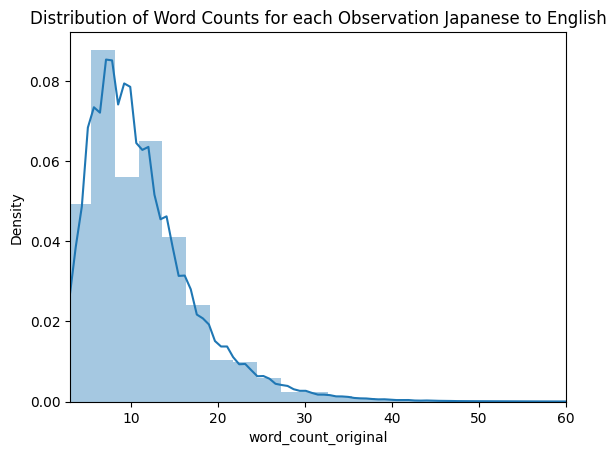

In [86]:
sns.distplot(df_jp['word_count_original'])
plt.title('Distribution of Word Counts for each Observation Japanese to English')
plt.xlim(3, 60)
plt.show()

/tmp/ipykernel_8878/2603328291.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_mdn['word_count_original'])


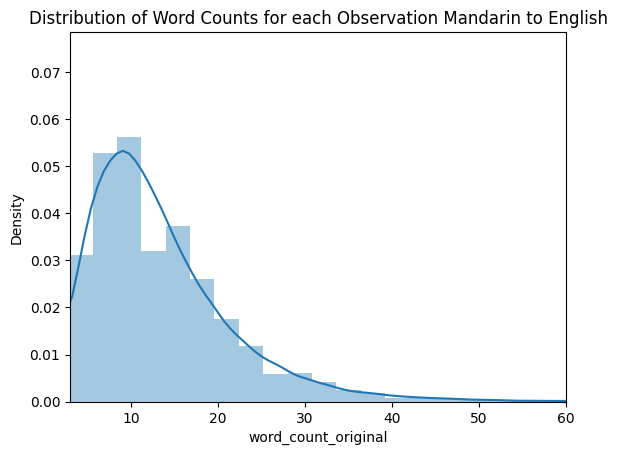

In [85]:
sns.distplot(df_mdn['word_count_original'])
plt.title('Distribution of Word Counts for each Observation Mandarin to English')
plt.xlim(3, 60)
plt.show()

In [87]:
# Changing all sentences to corpus

jp_text = df_jp['original'].to_string().lower()
mdn_text = df_mdn['original'].to_string().lower()

In [88]:
# Building tokens
jp_tokens = word_tokenize(jp_text)
mdn_tokens = word_tokenize(mdn_text)

In [114]:
# Remove common stop words and punctuation:
stop_words_common = stopwords.words("english")
punctuations = list(string.punctuation)

stop_words_common.extend(["n't", "'s", "english", "'m", "know", "think"])
punctuations.extend(["..."])

# filter all words first to see what should/can be removed
jp_tokens2=[]
for word in jp_tokens:
    if word not in stop_words_common:
        if word not in punctuations:
            jp_tokens2.append(word)

mdn_tokens2=[]
for word in mdn_tokens:
    if word not in stop_words_common:
        if word not in punctuations:
            mdn_tokens2.append(word)

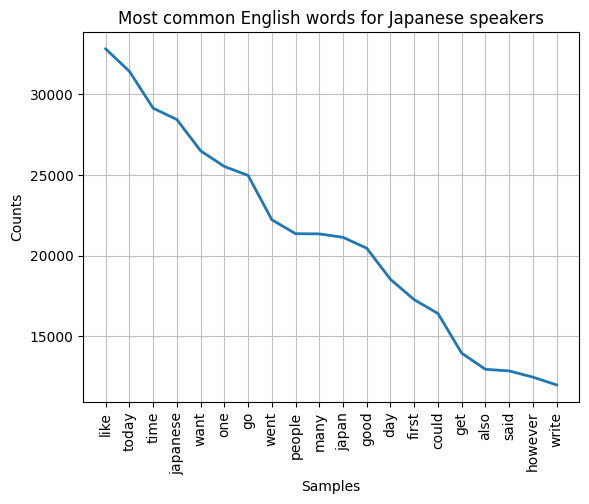

In [115]:
# Show the most common words of the Japanese and Mandarin Tokens

jp_dist = nltk.FreqDist(jp_tokens2)
plt.title("Most common English words for Japanese speakers")
jp_dist.plot(20);

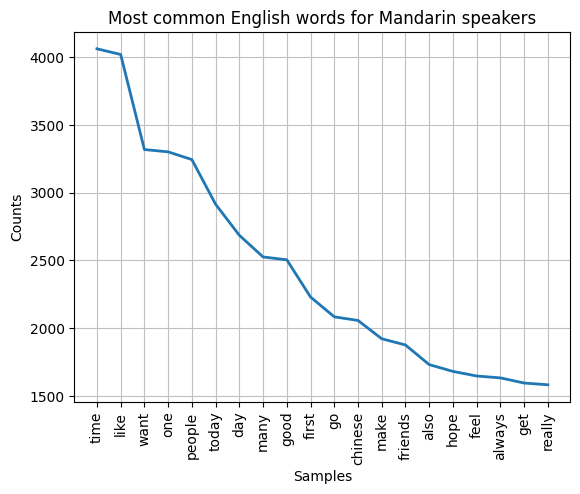

In [116]:
mdn_dist = nltk.FreqDist(mdn_tokens2)
plt.title("Most common English words for Mandarin speakers")
mdn_dist.plot(20);

In [117]:
# Make word clouds of common words
jp_wc = WordCloud(max_words=50).generate(" ".join(jp_tokens2))
mdn_wc = WordCloud(max_words=50).generate(" ".join(mdn_tokens2))

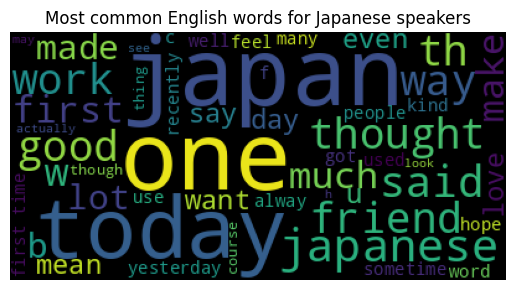

In [118]:
plt.imshow(jp_wc)
plt.axis("off")
plt.title("Most common English words for Japanese speakers")
plt.show()

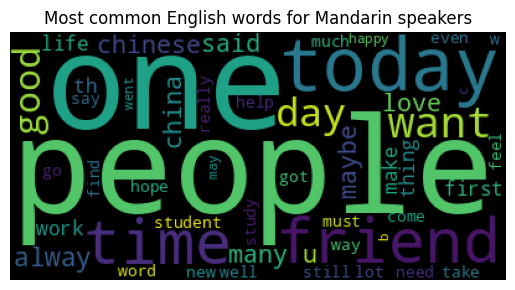

In [119]:
plt.imshow(mdn_wc)
plt.axis("off")
plt.title("Most common English words for Mandarin speakers")
plt.show()